In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import scipy as sp
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-27-2020.csv')

In [3]:
confirmed_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38883,38919,39044,39074,39096,39145,39170,39186,39192,39227
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,12073,12226,12385,12535,12666,12787,12921,13045,13153,13259
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,49413,49623,49826,50023,50214,50400,50579,50754,50914,51067
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1564,1564,1564,1681,1681,1753,1753,1836,1836,1836
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3848,3901,3991,4117,4236,4363,4475,4590,4672,4718


In [4]:
deaths_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1437,1437,1441,1444,1445,1446,1451,1451,1453,1453
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,353,358,362,364,367,370,370,373,375,377
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1659,1665,1672,1679,1689,1698,1703,1707,1711,1714
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,147,147,152,154,155,159,162,167,171,174


In [5]:
recoveries_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32576,32576,32576,32576,32576,32610,32619,32619,32635,32642
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6831,6888,6940,6995,7042,7139,7239,7309,7397,7397
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,34818,34923,35047,35180,35307,35428,35544,35654,35756,35860
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1164,1164,1164,1199,1199,1203,1203,1263,1263,1263
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1443,1445,1445,1449,1462,1473,1503,1554,1639,1707


In [6]:
latest_data.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,9/28/20 4:23,33.93911,67.709953,39227,1453,32642,5132.0,Afghanistan,100.767202,3.704081
1,NaN,NaN,NaN,Albania,9/28/20 4:23,41.15330,20.168300,13259,377,7397,5485.0,Albania,460.733894,2.843352
2,NaN,NaN,NaN,Algeria,9/28/20 4:23,28.03390,1.659600,51067,1714,35860,13493.0,Algeria,116.455611,3.356375
3,NaN,NaN,NaN,Andorra,9/28/20 4:23,42.50630,1.521800,1836,53,1263,520.0,Andorra,2376.237624,2.886710
4,NaN,NaN,NaN,Angola,9/28/20 4:23,-11.20270,17.873900,4718,174,1707,2837.0,Angola,14.355144,3.688003


In [7]:
cols = confirmed_df.keys()

In [8]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [9]:
dates = confirmed.keys()

In [10]:
world_cases = [] # to store total cases
total_deaths = [] # to store total deaths
mortality_rate = [] # to store mortality rate
recovery_rate = [] # to store recovery rate
total_recovered = [] 
total_active = []

Aus_cases = [] 
Aus_deaths = [] 
Aus_recoveries = []

for i in dates:
    # calculate sums
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()

    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)

    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    Aus_cases.append(confirmed_df[confirmed_df['Country/Region']=='Australia'][i].sum())    
    Aus_deaths.append(deaths_df[deaths_df['Country/Region']=='Australia'][i].sum())
    Aus_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Australia'][i].sum())

In [11]:
def get_daily_increase(data):
    increment_count = [] 
    for i in range(len(data)):
        if i == 0:
            increment_count.append(data[0])
        else:
            increment_count.append(data[i]-data[i-1])
    return increment_count

In [12]:
# confirmed cases
world_daily_increase = get_daily_increase(world_cases)
Aus_daily_increase = get_daily_increase(Aus_cases)

# deaths
world_daily_death = get_daily_increase(total_deaths)
Aus_daily_death = get_daily_increase(Aus_deaths)

# recoveries
world_daily_recovery = get_daily_increase(total_recovered)
Aus_daily_recovery = get_daily_increase(Aus_recoveries)

In [13]:
# days from the first day in the dataset i.e. Jan 22, 2020 (1/22/2020)
days = np.array([i for i in range(len(dates))]).reshape(-1, 1)

# reshaping the data
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [14]:
num_days_future = 15
forecast_future = np.array([i for i in range(len(dates)+num_days_future)]).reshape(-1, 1)
adjusted_dates = forecast_future[:-15]

In [15]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
dates_for_forecast_future = []
for i in range(len(forecast_future)):
    dates_for_forecast_future.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [16]:
def plot_stats(x_data, y_data, title, y_label):
    '''
    INPUT - data to be plotted on X-axis and Y-axis and a strings for title, and y-axis label
    
    OUTPUT - function doesn't return anything but prints required plots
    '''
    plt.plot(x_data, y_data)
    plt.title(title)
    plt.xlabel('Days Since Jan 22, 2020')
    plt.ylabel(y_label)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

In [17]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]

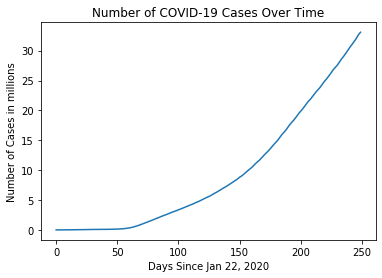

In [18]:
plot_stats(adjusted_dates, world_cases/1000000,'Number of COVID-19 Cases Over Time','Number of Cases in millions')

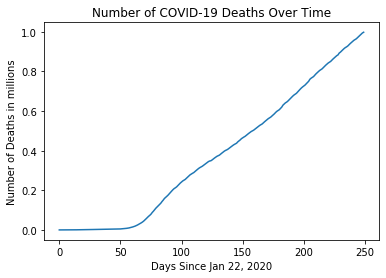

In [19]:
plot_stats(adjusted_dates, total_deaths/1000000,'Number of COVID-19 Deaths Over Time','Number of Deaths in millions')

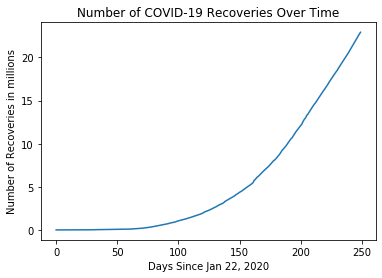

In [20]:
plot_stats(adjusted_dates, total_recovered/1000000, 'Number of COVID-19 Recoveries Over Time', 'Number of Recoveries in millions')

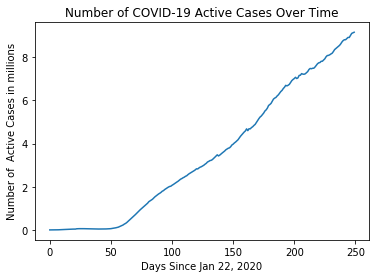

In [21]:
plot_stats(adjusted_dates, [x/1000000 for x in total_active], 'Number of COVID-19 Active Cases Over Time','Number of  Active Cases in millions')

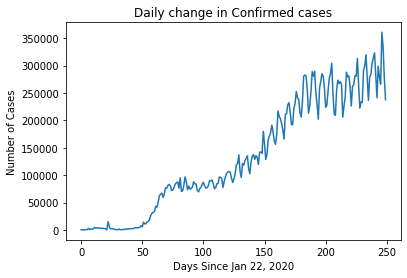

In [22]:
plot_stats(adjusted_dates, world_daily_increase, 'Daily change in Confirmed cases', 'Number of Cases')

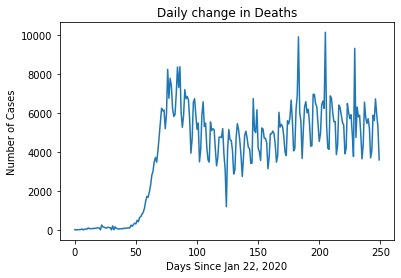

In [23]:
plot_stats(adjusted_dates, world_daily_death, 'Daily change in Deaths', 'Number of Cases')

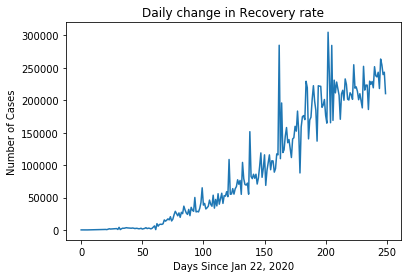

In [24]:
plot_stats(adjusted_dates, world_daily_recovery, 'Daily change in Recovery rate', 'Number of Cases')

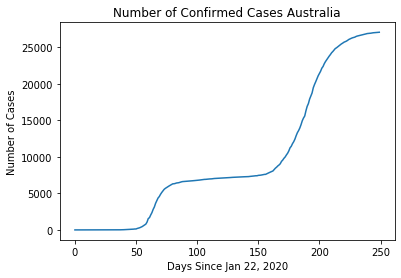

In [25]:
plot_stats(adjusted_dates, Aus_cases, 'Number of Confirmed Cases Australia','Number of Cases')

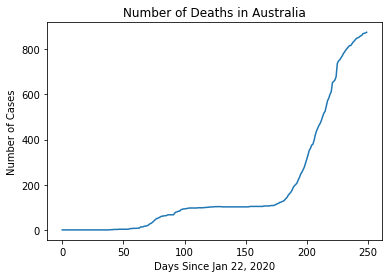

In [26]:
plot_stats(adjusted_dates, Aus_deaths, 'Number of Deaths in Australia', 'Number of Cases')

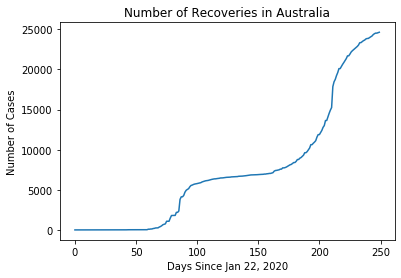

In [27]:
plot_stats(adjusted_dates, Aus_recoveries, 'Number of Recoveries in Australia', 'Number of Cases')

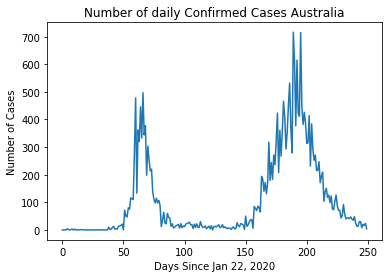

In [28]:
plot_stats(adjusted_dates, Aus_daily_increase, 'Number of daily Confirmed Cases Australia', 'Number of Cases')

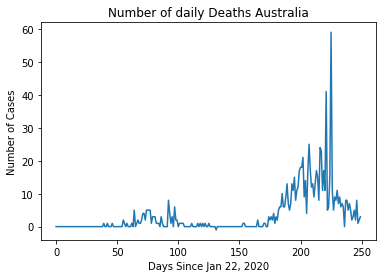

In [29]:
plot_stats(adjusted_dates, Aus_daily_death, 'Number of daily Deaths Australia', 'Number of Cases')

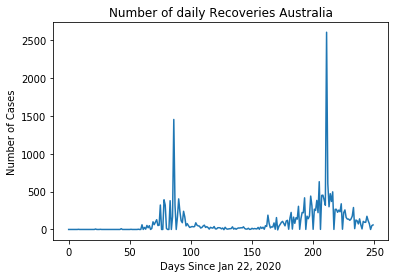

In [30]:
plot_stats(adjusted_dates, Aus_daily_recovery, 'Number of daily Recoveries Australia', 'Number of Cases')

In [31]:
states =  list(latest_data.loc[latest_data['Country_Region'] == 'Australia','Province_State'].unique())

In [32]:
states_confirmed_cases = []
states_death_cases = []
states_recovery_cases = []
states_mortality_rate = []

no_cases =[]

for state in states :
    cases = latest_data[latest_data['Province_State']==state]['Confirmed'].sum()
    if cases > 0:
        states_confirmed_cases.append(cases)
    else:
        no_cases.append(state)

if len(no_cases) != 0:
    for area in no_cases:
        states.remove(area)

states = [k for k, v in sorted(zip(states, states_confirmed_cases), key = operator.itemgetter(1), reverse = True)]
for i in range(len(states)) :
    states_confirmed_cases[i] = latest_data[latest_data['Province_State']==states[i]]['Confirmed'].sum()
    states_death_cases.append(latest_data[latest_data['Province_State']==states[i]]['Deaths'].sum())
    states_recovery_cases.append(latest_data[latest_data['Province_State']==states[i]]['Recovered'].sum())
    states_mortality_rate.append(states_death_cases[i]/states_confirmed_cases[i])

state_df = pd.DataFrame({'State': states, 'Number of Confirmed Cases': states_confirmed_cases,'Number of Deaths': states_death_cases, 'Mortality Rate': states_mortality_rate})
state_df

,State,Number of Confirmed Cases,Number of Deaths,Mortality Rate
0,Victoria,20149,787,0.039059
1,New South Wales,4218,53,0.012565
2,Queensland,1157,6,0.005186
3,Western Australia,676,9,0.013314
4,South Australia,468,4,0.008547
5,Tasmania,230,13,0.056522
6,Australian Capital Territory,113,3,0.026549
7,Northern Territory,33,0,0.000000


In [33]:
def plot_bar_graphs(x_axis, y_axis, title):
    plt.figure()
    plt.barh(x_axis, y_axis)
    plt.title(title)
    plt.show()

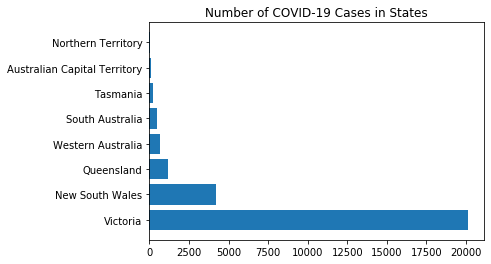

In [34]:
plot_bar_graphs(state_df['State'], state_df['Number of Confirmed Cases'], 'Number of COVID-19 Cases in States')

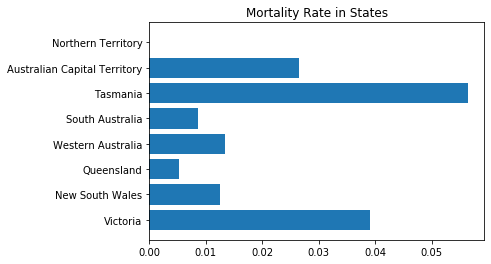

In [35]:
plot_bar_graphs(state_df['State'], state_df['Mortality Rate'], 'Mortality Rate in States')

In [36]:
def plot_rates(x_axis,y_axis,title,y_label,color):
    mean_rate = np.mean(y_axis)
    plt.plot(x_axis, y_axis, color = color)
    plt.axhline(y = mean_rate,linestyle='--', color='black')
    plt.title(title)
    plt.legend([y_label, 'y='+str(mean_rate)])
    plt.xlabel('Days Since Jan 22,2020')
    plt.ylabel(y_label)
    plt.show()

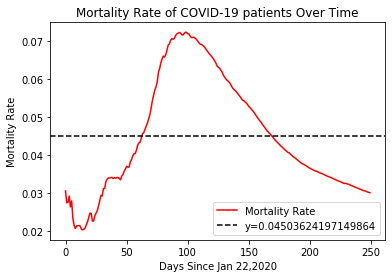

In [37]:
plot_rates(adjusted_dates, mortality_rate, 'Mortality Rate of COVID-19 patients Over Time', 'Mortality Rate','red')

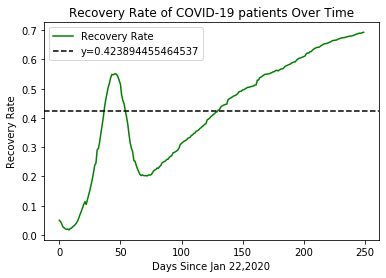

In [38]:
plot_rates(adjusted_dates, recovery_rate, 'Recovery Rate of COVID-19 patients Over Time', 'Recovery Rate','green')

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(days, world_cases, test_size=0.3, shuffle = False)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(175, 1)
(175, 1)
(75, 1)
(75, 1)


In [40]:
linear_model = LinearRegression(normalize = True, fit_intercept = True)

def fit_to_model(X_train, Y_train, X_test, Y_test):
    linear_model.fit(X_train, Y_train)
    test_linear_pred = linear_model.predict(X_test)
    print('MAE:', mean_absolute_error(test_linear_pred, Y_test))
    print('MSE:',mean_squared_error(test_linear_pred, Y_test))
    return test_linear_pred

test_linear_pred = fit_to_model(X_train, Y_train, X_test, Y_test)

MAE: 10382664.042825798
MSE: 124733943566376.0


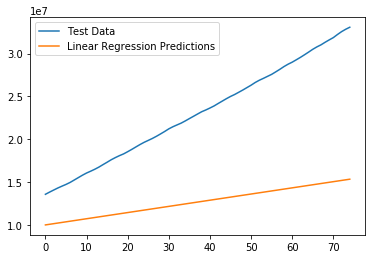

In [41]:
def plot_model_predictions(model,Y_test,test_linear_pred):
    plt.plot(Y_test)
    plt.plot(test_linear_pred)
    plt.legend(['Test Data',  model+' Regression Predictions'])
    
plot_model_predictions('Linear', Y_test, test_linear_pred)

In [42]:
def create_poly_model(degree, X1, Y1, X2, Y2):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X1)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y1)
    
    y_train_predicted = poly_model.predict(poly_features.fit_transform(X2))
    print('MAE:', mean_absolute_error(y_train_predicted, Y2))
    print('MSE:',mean_squared_error(y_train_predicted, Y2))
    return y_train_predicted

test_poly3_pred = create_poly_model(3, X_train, Y_train, X_test, Y_test)
test_poly4_pred = create_poly_model(4, X_train, Y_train, X_test, Y_test)
test_poly_avg = []
for i in range(len(test_poly4_pred)):
    test_poly_avg.append((test_poly3_pred[i] + test_poly4_pred[i])//2)

MAE: 1616490.101948561
MSE: 2858560065694.6934
MAE: 1245480.2261725655
MSE: 3291041948680.317


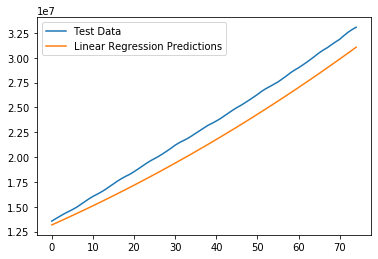

In [43]:
plot_model_predictions('Linear', Y_test, test_poly3_pred)

In [46]:
Linear_pred = fit_to_model(days, world_cases, days, world_cases)
Poly3_pred = create_poly_model(3, days, world_cases, days, world_cases)
Poly4_pred = create_poly_model(4, days, world_cases, days, world_cases)
Poly_avg = []
for i in range(len(Poly4_pred)):
    Poly_avg.append((Poly3_pred[i] + Poly4_pred[i])//2)


MAE: 2994747.6663344842
MSE: 11800572746176.887
MAE: 230388.75126249122
MSE: 75378884596.02686
MAE: 206584.33649166356
MSE: 58733251834.81759


In [47]:
def plot_future_predictions(x_data, y_data, predictions, algorithms):
    plt.figure(figsize=(12, 9))
    plt.plot(x_data, y_data)
    for prediction in predictions:
        plt.plot(days, prediction, linestyle='dashed')
    plt.title('Number of COVID-19 Cases Over Time')
    plt.xlabel('Days Since Jan 22, 2020')
    plt.ylabel('Number of Cases')
    legend = ['Confirmed Cases']
    for algorithm in algorithms:
        legend.append(algorithm)
    plt.legend(legend)
    plt.ticklabel_format(style = 'plain')
    plt.show()

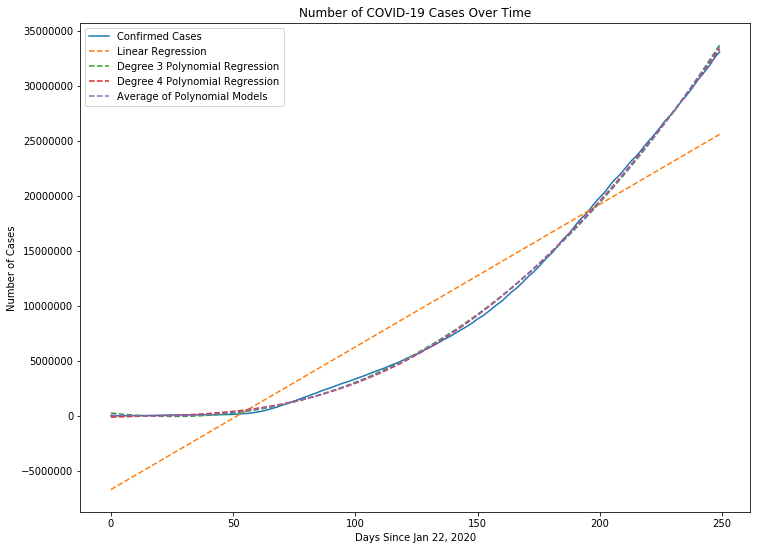

In [48]:
pred = [Linear_pred, Poly3_pred, Poly4_pred, Poly_avg]
algos = ['Linear Regression','Degree 3 Polynomial Regression','Degree 4 Polynomial Regression','Average of Polynomial Models']
plot_future_predictions(adjusted_dates, world_cases,pred,algos)

In [49]:
preds_m = np.array(Poly_avg).reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': dates_for_forecast_future[-15:], 'Number of worldwide cases predicted': np.round(preds_m[-15:])})
poly_df

,Date,Number of worldwide cases predicted
0,09/28/2020,29125784.0
1,09/29/2020,29430967.0
2,09/30/2020,29737710.0
3,10/01/2020,30046008.0
4,10/02/2020,30355857.0
5,10/03/2020,30667252.0
6,10/04/2020,30980188.0
7,10/05/2020,31294660.0
8,10/06/2020,31610663.0
9,10/07/2020,31928192.0


In [50]:
preds_m = np.array(Poly4_pred).reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': dates_for_forecast_future[-15:], 'Number of worldwide cases predicted': np.round(preds_m[-15:])})
poly_df

,Date,Number of worldwide cases predicted
0,09/28/2020,29103257.0
1,09/29/2020,29399775.0
2,09/30/2020,29697430.0
3,10/01/2020,29996206.0
4,10/02/2020,30296089.0
5,10/03/2020,30597066.0
6,10/04/2020,30899121.0
7,10/05/2020,31202240.0
8,10/06/2020,31506408.0
9,10/07/2020,31811610.0
